In [1]:
##Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## data csv file is load
data = pd.read_csv("fraud.csv")

In [3]:
##Display dataset
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
3,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0,0
4,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
16422,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
16423,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
16424,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [4]:
## Total no. of rows and columns
data.shape

(16426, 9)

In [5]:
## Total no. of row and columns are not NAN
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
## Total no. of row and columns info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.1+ MB


In [7]:
## Converting string to nominal data
for i in data:
    try:
        data[i]=data[i].astype(float)
    except ValueError:
        pass

In [8]:
dataset=pd.get_dummies(data,drop_first=True)
dataset=dataset.drop(['step'],axis=1)
b=dataset['isFraud']
dataset=dataset.drop(['isFraud'],axis=1)
dataset.loc[:,'isFraud']=b
dataset

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0,0,1,0,0.0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0,0,1,0,0.0
2,11668.14,41554.00,29885.86,0.00,0.00,0.0,0,0,1,0,0.0
3,7817.71,53860.00,46042.29,0.00,0.00,0.0,0,0,1,0,0.0
4,7107.77,183195.00,176087.23,0.00,0.00,0.0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16421,339682.13,339682.13,0.00,0.00,339682.13,0.0,1,0,0,0,1.0
16422,6311409.28,6311409.28,0.00,0.00,0.00,0.0,0,0,0,1,1.0
16423,6311409.28,6311409.28,0.00,68488.84,6379898.11,0.0,1,0,0,0,1.0
16424,850002.52,850002.52,0.00,0.00,0.00,0.0,0,0,0,1,1.0


In [9]:
## Using sklearn model we are testing and training dataset
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,0:10]
y=dataset.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [10]:
## Using Decision Tree Algorithm predicting Fraud or not Fraud is occur
def Decision_Tree(X_train,X_test,y_train,y_test):
    from sklearn.tree import DecisionTreeClassifier
    cl=DecisionTreeClassifier(criterion='entropy',random_state = 0)
    cl.fit(X_train,y_train)
    c2=cl.predict(X_test)
    from sklearn.metrics import confusion_matrix
    c3=confusion_matrix(y_test,c2)
    print(c3)
    tp=c3[0][0]
    tn=c3[1][1]
    fn=c3[0][1]
    fp=c3[1][0]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    print("Accuracy:",Accuracy*100)
Decision_Tree(X_train,X_test,y_train,y_test)

[[2026    9]
 [  10 2062]]
Accuracy: 99.5373752130509


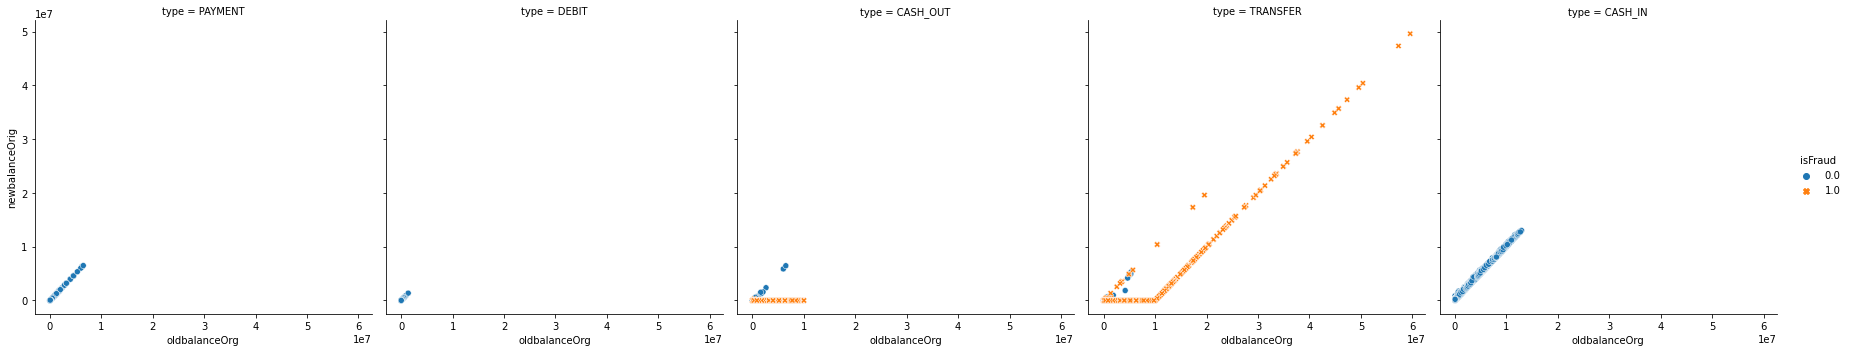

In [11]:
## Using seaborn data visualisation is displayed
import seaborn as sb
sb.relplot(data=data,x="oldbalanceOrg",y="newbalanceOrig",col="type",hue="isFraud",style="isFraud")
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
## Using SVM algorithm
def SVC(X_train,X_test,y_train,y_test):
    from sklearn.svm import SVC
    cl=SVC(kernel = 'linear',random_state=0)
    cl.fit(X_train,y_train)
    c2=cl.predict(X_test)
    from sklearn.metrics import confusion_matrix
    c3=confusion_matrix(y_test,c2)
    print(c3)
    tp=c3[0][0]
    tn=c3[1][1]
    fn=c3[0][1]
    fp=c3[1][0]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    print("Accuracy:",Accuracy*100)
SVC(X_train,X_test,y_train,y_test)

[[1820  215]
 [   5 2067]]
Accuracy: 94.64329194058924
